# Bias and Fairness in Speaker Verification 



## 1. Introduction to Speaker Verification

### What is Speaker Verification?

Speaker verification is a form of biometric authentication that determines whether a given speech sample matches a claimed identity. This technology is widely used in applications like voice-based device unlocking, personalized virtual assistants, and security systems. The core idea is to extract unique features from a person's voice — much like a fingerprint — and use them to verify their identity. The process typically involves converting speech into a numerical representation called an embedding and then comparing this embedding to previously stored ones. If the similarity score exceeds a certain threshold, the system confirms the identity; otherwise, it rejects it. This makes speaker verification powerful but also sensitive to variations in audio data and speaker characteristics.



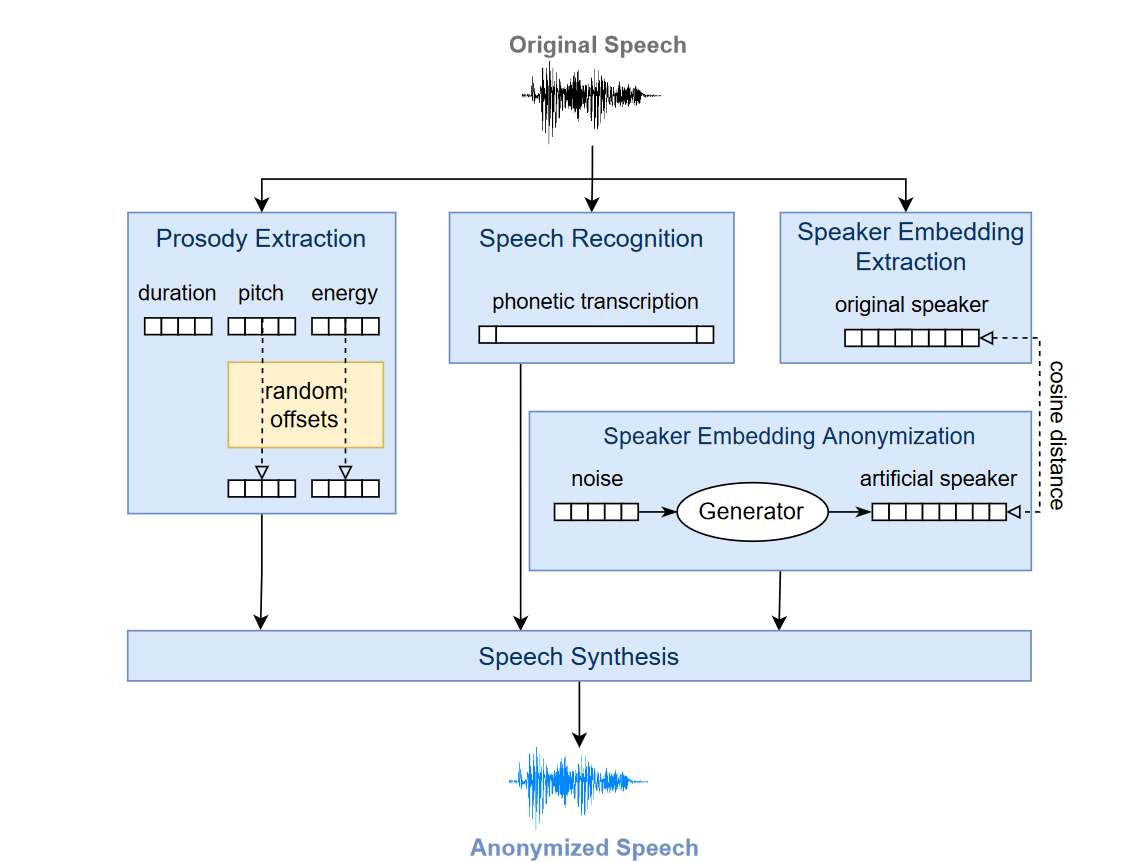

In [17]:
from IPython.display import Image, display
display(Image(filename='C:/Users/thadavan/seminar/grafik(2).png',  width=300, height=200))






### Datasets for Speaker Verification 


Voxceleb : One of the most popular dataset for speaker verification is VoxCeleb. It is a widely used dataset with speech samples from thousands of speakers across different nationalities and genders. Metadata in this dataset include speaker ID, gender and nationality. 


Refer to the following paper to understand more about VoxCeleb : https://www.robots.ox.ac.uk/~vgg/publications/2019/Nagrani19/nagrani19.pdf

### Load and Explore VoxCeleb Metadata

Let's start by loading and exploring the VoxCeleb metadata to get a sense of the distribution of speakers.

In [ ]:
import pandas as pd

# Load metadata (example CSV)
metadata_path = "C:/Users/thadavan/seminar/notebooks/vox1_meta.csv"
metadata = pd.read_csv(metadata_path)

metadata = pd.read_csv('C:/Users/thadavan/seminar/notebooks/vox1_meta.csv', sep='\t')  


# Inspect data
metadata.head()

,VoxCeleb1 ID,VGGFace1 ID,Gender,Nationality,Set
0,id10001,A.J._Buckley,m,Ireland,dev
1,id10002,A.R._Rahman,m,India,dev
2,id10003,Aamir_Khan,m,India,dev
3,id10004,Aaron_Tveit,m,USA,dev
4,id10005,Aaron_Yoo,m,USA,dev


### 📝 **Exercise 1 :**   Explore Gender and Nationality Distribution

In this exercise, you will visualize the distribution of speakers based on gender and nationality. This will help you understand the dataset composition and identify potential representation biases

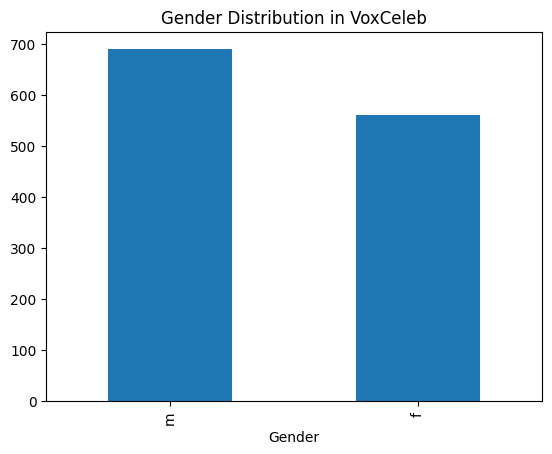

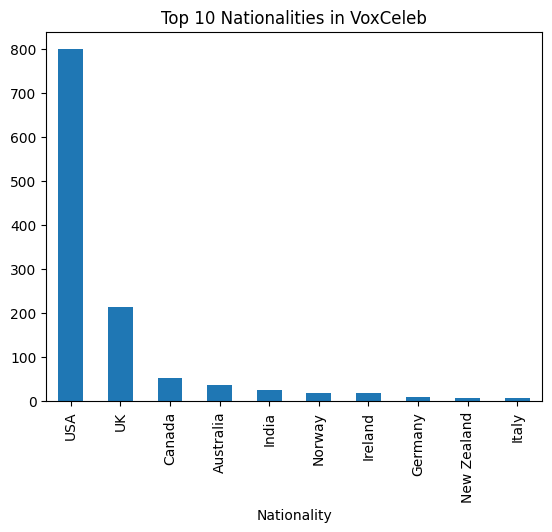

In [30]:
import matplotlib.pyplot as plt

# Plot gender distribution
metadata['Gender'].value_counts().plot(kind='bar')
plt.title("Gender Distribution in VoxCeleb")
plt.show()

# Plot nationality distribution
metadata['Nationality'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Nationalities in VoxCeleb")
plt.show()


## 2. Understanding Data Biases

Bias can inadvertently creep into machine learning systems, including speaker verification models. Biases often arise from imbalances or limitations in the training data, which can cause models to perform poorly for certain groups of people. Let’s break this down into different types of bias to understand how they manifest in audio data.
Types of Bias:

    Historical Bias: This occurs when societal inequalities are reflected in the dataset itself. For instance, if VoxCeleb contains more male speakers than female speakers, the model may become biased toward male voices, leading to higher error rates for women.

    Representation Bias: When some groups are underrepresented in the dataset, the model may struggle to generalize to those groups. For example, if most speakers in the dataset are from a handful of nationalities, the system may perform poorly for speakers with less-represented accents.

    Measurement Bias:  Measurement bias arises when the way data is collected or labeled distorts reality. In speaker verification, gender labels can be misleading — for example, a high-pitched male voice might be misclassified as female, and vice versa.

### 📝 **Exercise 2 :**  Analyze Bias in VoxCeleb

You can explore potential biases by looking at the distribution of gender and speech durations.

In [32]:
#Representation Bias 

gender_counts = metadata['Gender'].value_counts(normalize=True)
print("Gender Representation:\n", gender_counts)



Gender Representation:
 Gender
m    0.551559
f    0.448441
Name: proportion, dtype: float64


To understand the historical bias in detail, perform the following task . 

### 📝 **Task 1 :** Analyze Gender and Nationality Distribution

In this task, you’ll compute the percentage distribution for gender and nationality, and explore their intersections. This will help you identify potential imbalances in the dataset. 

In [33]:
# Compute gender distribution percentages
gender_counts = metadata['Gender'].value_counts(normalize=True) * 100

# Compute nationality distribution percentages
nationality_counts = metadata['Nationality'].value_counts(normalize=True) * 100

# Compute intersection of gender and nationality
intersection_counts = metadata.groupby(['Gender', 'Nationality']).size()
intersection_percentages = (intersection_counts / len(metadata)) * 100

# Display results
print("Gender Distribution (%):")
print(gender_counts)

print("\nTop 10 Nationality Distribution (%):")
print(nationality_counts.head(10))

print("\nIntersection of Gender and Nationality (%):")
print(intersection_percentages.sort_values(ascending=False).head(10)) 

Gender Distribution (%):
Gender
m    55.155875
f    44.844125
Name: proportion, dtype: float64

Top 10 Nationality Distribution (%):
Nationality
USA            63.868905
UK             17.186251
Canada          4.316547
Australia       2.957634
India           2.078337
Norway          1.598721
Ireland         1.438849
Germany         0.719424
New Zealand     0.639488
Italy           0.639488
Name: proportion, dtype: float64

Intersection of Gender and Nationality (%):
Gender  Nationality
m       USA            34.452438
f       USA            29.416467
m       UK             10.151878
f       UK              7.034373
m       Canada          2.318145
f       Canada          1.998401
m       Australia       1.998401
        India           1.199041
        Norway          1.039169
        Ireland         1.039169
dtype: float64


### 🎯 **Your Goal:**
- **Understand Gender Distribution:** See how speakers are distributed across gender categories.
- **Examine Nationality Representation:** Check which nationalities dominate the dataset.
- **Explore Intersectional Bias:** Discover which gender-nationality combinations are most or least represented.


After running the code, reflect on the following:
- Are certain gender or nationality groups overrepresented or underrepresented?
- How might these imbalances affect the performance of a speaker verification model?

### 📝 **Task 2 :**

Now listen to the following audio file 


In [36]:
from IPython.display import Audio, display

# Provide the full path to your audio file
audio_file_path = 'C:/Users/thadavan/seminar/00003.wav'

# Display and play the audio
display(Audio(filename=audio_file_path))



Again listen to the following audio 

In [37]:
from IPython.display import Audio, display

# Provide the full path to your audio file
audio_file_path = 'C:/Users/thadavan/seminar/00001.wav'

# Display and play the audio
display(Audio(filename=audio_file_path))



#### Question 1 : Are binary gender labels truly useful for speaker verification, given the natural variation in pitch and voice characteristics? Give reason. 

''' Write your answer here'''

## 3. Training a Speaker Verification Model

To experiment with speaker verification, we can train a model based on a ResNet architecture. ResNet models are commonly used for speaker verification tasks due to their ability to learn rich audio features.

In [ ]:
### Using a ResNet-based Model
import torch
from models import ResNetSpeakerModel  # Hypothetical model

# Initialize model
model = ResNetSpeakerModel()

After training the model, we need to evaluate how well it distinguishes between speakers and whether its performance varies across different demographic groups.

 #### False Positives and False Negatives  


False Positive (FP): This occurs when the model incorrectly predicts a positive class for an instance that actually belongs to the negative class.

For example, imagine a disease detection model. If the model predicts that a healthy person has the disease, it would be a False Positive.

False Negative (FN): This happens when the model incorrectly predicts a negative class for an instance that actually belongs to the positive class.

For the disease detection example, if the model predicts that a sick person is healthy, it would be a False Negative.


### Understanding the Threshold

The threshold is a critical component of speaker verification. It determines the score above which a speaker is considered verified. Choosing the right threshold is a trade-off: lowering it reduces false negatives but increases false positives, and vice versa. The threshold can also have unequal effects on different groups, contributing to fairness issues.

#### How Threshold Affects FP and FN

When we are using a model that outputs probabilities for classes (for example, the probability that a patient has a disease), we can set a threshold to decide the cutoff point for classification:

    If the model’s probability output for an instance is above the threshold, we classify it as positive (e.g., the person has the disease).
    If the model’s probability is below the threshold, we classify it as negative (e.g., the person does not have the disease).

As the threshold increases or decreases, the number of False Positives and False Negatives will change:

    Lower threshold (closer to 0): More instances will be classified as positive, so False Positives (FP) may increase, and False Negatives (FN) may decrease.
    Higher threshold (closer to 1): More instances will be classified as negative, so False Positives (FP) will decrease, and False Negatives (FN) may increase.

### Visualizing the Effect of Thresholds on FP and FN
 

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Generate example data
np.random.seed(42)
y_true = np.random.choice([0, 1], size=100)
y_prob = np.random.rand(100)

# Folder to save plots
output_folder = "fp_fn_plots"
os.makedirs(output_folder, exist_ok=True)

# Function to calculate and plot FP/FN
def save_fp_fn_plot(threshold):
    y_pred = (y_prob >= threshold).astype(int)
    FP = np.sum((y_pred == 1) & (y_true == 0))
    FN = np.sum((y_pred == 0) & (y_true == 1))
    
    # Plot
    plt.figure(figsize=(6, 4))
    plt.bar(['False Positives', 'False Negatives'], [FP, FN], color=['red', 'blue'])
    plt.title(f'FP and FN at Threshold {threshold:.2f}')
    plt.ylabel('Count')
    
    # Save plot
    filename = f"fp_fn_threshold_{threshold:.2f}.png"
    filepath = os.path.join(output_folder, filename)
    plt.savefig(filepath)
    plt.close()
    print(f"Saved: {filepath}")

# Generate and save plots for selected thresholds
for threshold in np.arange(0.1, 1.0, 0.1):
    save_fp_fn_plot(threshold)


Saved: fp_fn_plots\fp_fn_threshold_0.10.png
Saved: fp_fn_plots\fp_fn_threshold_0.20.png
Saved: fp_fn_plots\fp_fn_threshold_0.30.png
Saved: fp_fn_plots\fp_fn_threshold_0.40.png
Saved: fp_fn_plots\fp_fn_threshold_0.50.png
Saved: fp_fn_plots\fp_fn_threshold_0.60.png
Saved: fp_fn_plots\fp_fn_threshold_0.70.png
Saved: fp_fn_plots\fp_fn_threshold_0.80.png
Saved: fp_fn_plots\fp_fn_threshold_0.90.png


## 4. Evaluating Model Performance

Once the model is trained, it outputs similarity scores for speaker pairs. We can use these scores to visualize the system's performance through Detection Error Tradeoff (DET) curves, which show the balance between false positives and false negatives.

In [ ]:
# Load scores
scores_df = pd.read_csv("./scores.csv")

# Plot DET Curve
from sklearn.metrics import det_curve
fpr, fnr, thresholds = det_curve(scores_df['true_label'], scores_df['score'])

plt.plot(fpr, fnr)
plt.xlabel('False Positive Rate')
plt.ylabel('False Negative Rate')
plt.title('DET Curve')
plt.grid()
plt.show()